In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
import datetime
import os

% matplotlib inline

In [2]:
os.environ['TIINGO_API_KEY'] = 'ba62a0fba810f937382b5e772f8f152b58c4ebfc'

In [29]:
import pandas_datareader.data as web

from datetime import datetime

start = datetime(2005, 9, 1)

end = datetime(2019, 9, 1)

f = web.DataReader(['VOO', 'GOOGL'], 'tiingo', start, end)

In [30]:
f['returns'] = f['close'].pct_change()

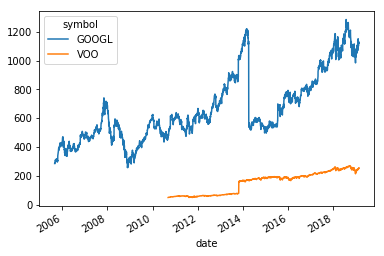

In [31]:
f['close'].unstack('symbol').plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D415766D8>,
      dtype=object)

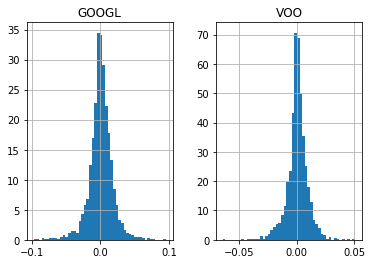

In [35]:
f.query('returns < 0.1 and returns > -0.1').unstack('symbol')['returns'].hist(bins=50, normed=True)

In [36]:
import seaborn as sns

C:\Anaconda3\envs\finance\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


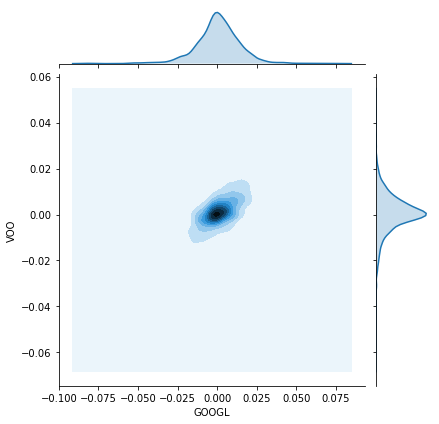

In [41]:
df = f.query('returns < 0.1 and returns > -0.1').unstack('symbol')['returns']

sns.jointplot(x="GOOGL", y="VOO", data=df, kind="kde")

In [ ]:
sns.catplot(x="symbol", y="returns", kind="swarm", data=f.query('returns < 0.1 and returns > -0.1').reset_index('symbol'))